# Palmer Penguins

***

This notebook contains my analysis of the famous Palmer Penguins dataset. “Artwork by @allison_horst”.

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)




![Bill lenght and Bill depth](../myproject/Images/culmen_depth.png)

# Imports

***

The following imports were used during the course of this project. 

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large multi-dimensional arrays and matrices. It also supplies a large collecion of high-level mathematical functions to opperate on these arrays. [NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in conjunction with its numerical mathematics extension NumPy.

We use [Seaborn]()



In [26]:
#Data Frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

****

Load the palmer penguins data set from a URL. We have imported this file from the official seaborn github account. 

In [2]:
#Load the penguins dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded, and we can inspect it. From inspection the dataset contains 344 rows and seven columns. Each row gives the information that was collected for each individual penguin. For each penguin there are seven possible variables.

The seven variables in the dataset are

- species
- island
- bill_length in mm
- bill depth in mm
- flipper length in mm
- weight in g
- sex 

In [3]:
#Look at this data
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Inspect data
***

Firstly lets look at the first penguin in the dataset. We can use the iloc method to do this. As shown below our first penguin is a Male 'Adelie' penguin who was analysed on the Torgersen Island, and who had a body mass of 3750g.

In [60]:
# Look at the first row. This represents the first penguin in the dataset. 
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

Let us look at one of the columns now. To do this just type the name of the column you want to look at, as shown below for the 'sex' column which lists the sex of each penguin.

In [5]:
#Sex of penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

Not hugely informative right, however if we combine this with the value_counts method, we can then get a clear picture of the values of each sex in the dataset. This is much more useful information for us.

In [6]:
#Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

We can explore our dataset futher by checking its metadata using the info method as shown below. We can get several useful pieces of information from this method. Firstly we can see that the dataset contains 3 object types, and 4 numerical types. The numerical types all have a 64bit float value. We can also see that several columns have null values.  The sex column has 11 null values where perhaps it was not possible to distinguish the sex of those 11 penguins at the time of recording the information. The bill length, bill depth, flipper length and body mass columns all have 2 null values also. We can confirm these figure by is null function with the sum function as shown below also.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [67]:
#Count the number of missing values in each column.
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
#Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Visualisation 

### Pie Chart - Species Count

We can firstly look at a pie chart to examine the overall penguin population by species. This has been done below.

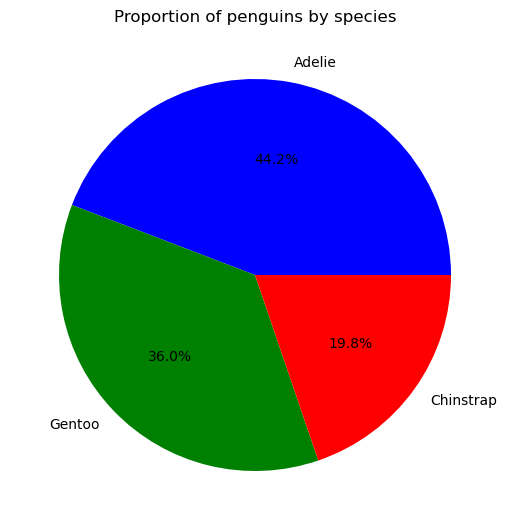

In [85]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

species_counts = df['species'].value_counts()
colors = ['blue', 'green', 'red']
plt.figure(figsize=(5, 5))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=colors) #autopct='%1.1f%%' means that the percentages will be shown on the pie chart.
plt.title('Proportion of penguins by species')
plt.show()

### Pie Chart - Island count

We can also look at a pie-chart to gauge the percentage of penguins on each island. This has being done below.

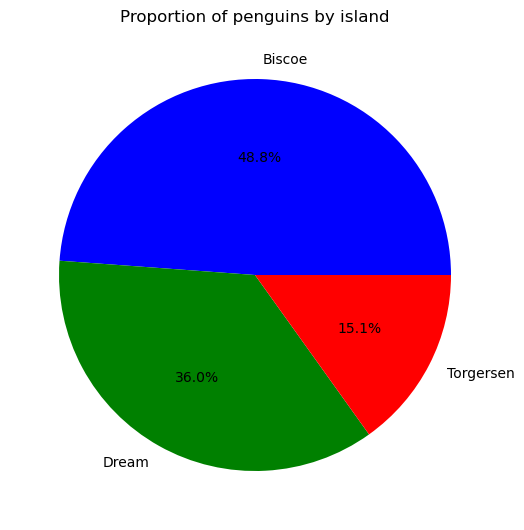

In [88]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

island_counts = df['island'].value_counts()
colors = ['blue', 'green', 'red']
plt.figure(figsize=(5, 5))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', colors=colors) 
#autopct='%1.1f%%' means that the percentages will be shown on the pie chart.
plt.title('Proportion of penguins by island')
plt.show()

### Histograms - Bill length

The following code will plot a histogram of the bill-length of each species of penguin in a different colour. Here we are using the object orientated approach to doing this with matplotlib. Firstly we are creating new dataframe with each distinct species of penguins and then we are creating a plot consisting of the bill length vs frequency for each species of penguin in a different colour.

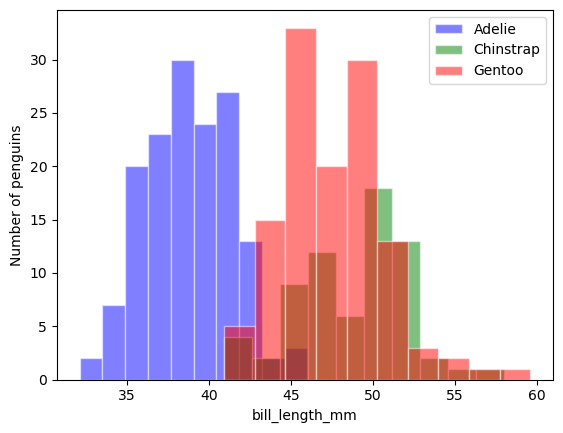

In [48]:
adelie = df[df.species == "Adelie"] #Create a new data frame with only the Adelie penguins.
chinstrap = df[df.species=='Chinstrap'] #Create a new data frame with only the Chinstrap penguins.
Gentoo = df[df.species=='Gentoo']   #Create a new data frame with only the Gentoo penguins.

fig, ax = plt.subplots() #Create a new figure and axis. 

variable = "bill_length_mm" #Choose a variable to plot the histogram of.

ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") 
#Plot a histogram of the variable for the Adelie penguins. bins=10 means that the histogram will have 10 bins. 
#alpha=0.5 means that the bars will be semi-transparent. alpha=1 would mean that the bars are opaque.
#alpha=0 would mean that the bars are completely transparent.
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10,  label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable) #Set the x-axis label.
ax.set_ylabel("Number of penguins") #Set the y-axis label.
ax.legend() #Show the legend.


plt.show() #Show the plot.



Seaborn makes things much easier for us. We could do the same as above by using the simple seaborn code below


<Axes: xlabel='bill_length_mm', ylabel='Count'>

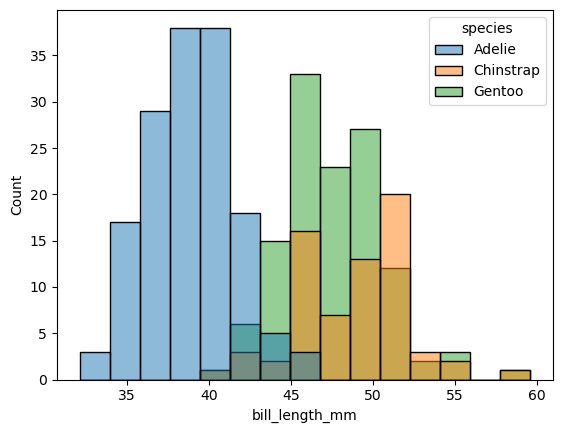

In [45]:
sns.histplot(df, x="bill_length_mm",  stat='count', bins=15, hue="species") 
#Plot a histogram of the bill length for each species of penguin using seaborn.

### Histogram - Bill depth

We can use the same approach as above to plot a histogram of the bill depth for each species of penguin.



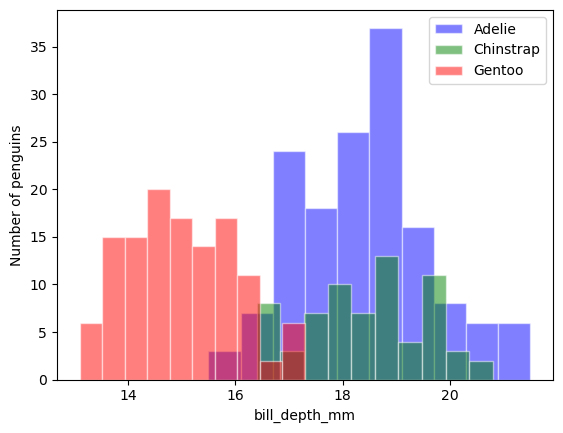

In [54]:
adelie = df[df.species == "Adelie"] #Create a new data frame with only the Adelie penguins.
chinstrap = df[df.species=='Chinstrap'] #Create a new data frame with only the Chinstrap penguins.
Gentoo = df[df.species=='Gentoo']  #Create a new data frame with only the Gentoo penguins.

fx, ax = plt.subplots()

variable = "bill_depth_mm"  #Choose a variable to plot the histogram of.

ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") 
#Plot a histogram of the variable for the Adelie penguins. bins=10 means that the histogram will have 10 bins.
#alpha=0.5 means that the bars will be semi-transparent. alpha=1 would mean that the bars are opaque.
#alpha=0 would mean that the bars are completely transparent.
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10, label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable)     #Set the x-axis label.
ax.set_ylabel("Number of penguins") #Set the y-axis label.
ax.legend() #Show the legend.

plt.show()  #Show the plot.


Or by using the seaborn histplot code.....

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

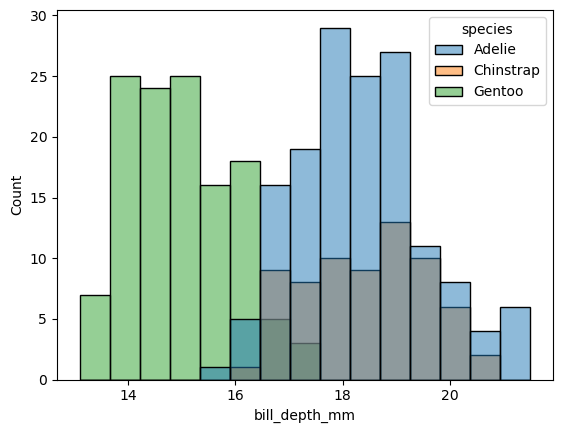

In [52]:
sns.histplot(df, x="bill_depth_mm",  stat='count', bins=15, hue="species") 
#Plot a histogram of the bill depth for each species of penguin using seaborn.

## Species Based Island count plot


Trying a 3d graph of bill_lenght, bill_depth, and species



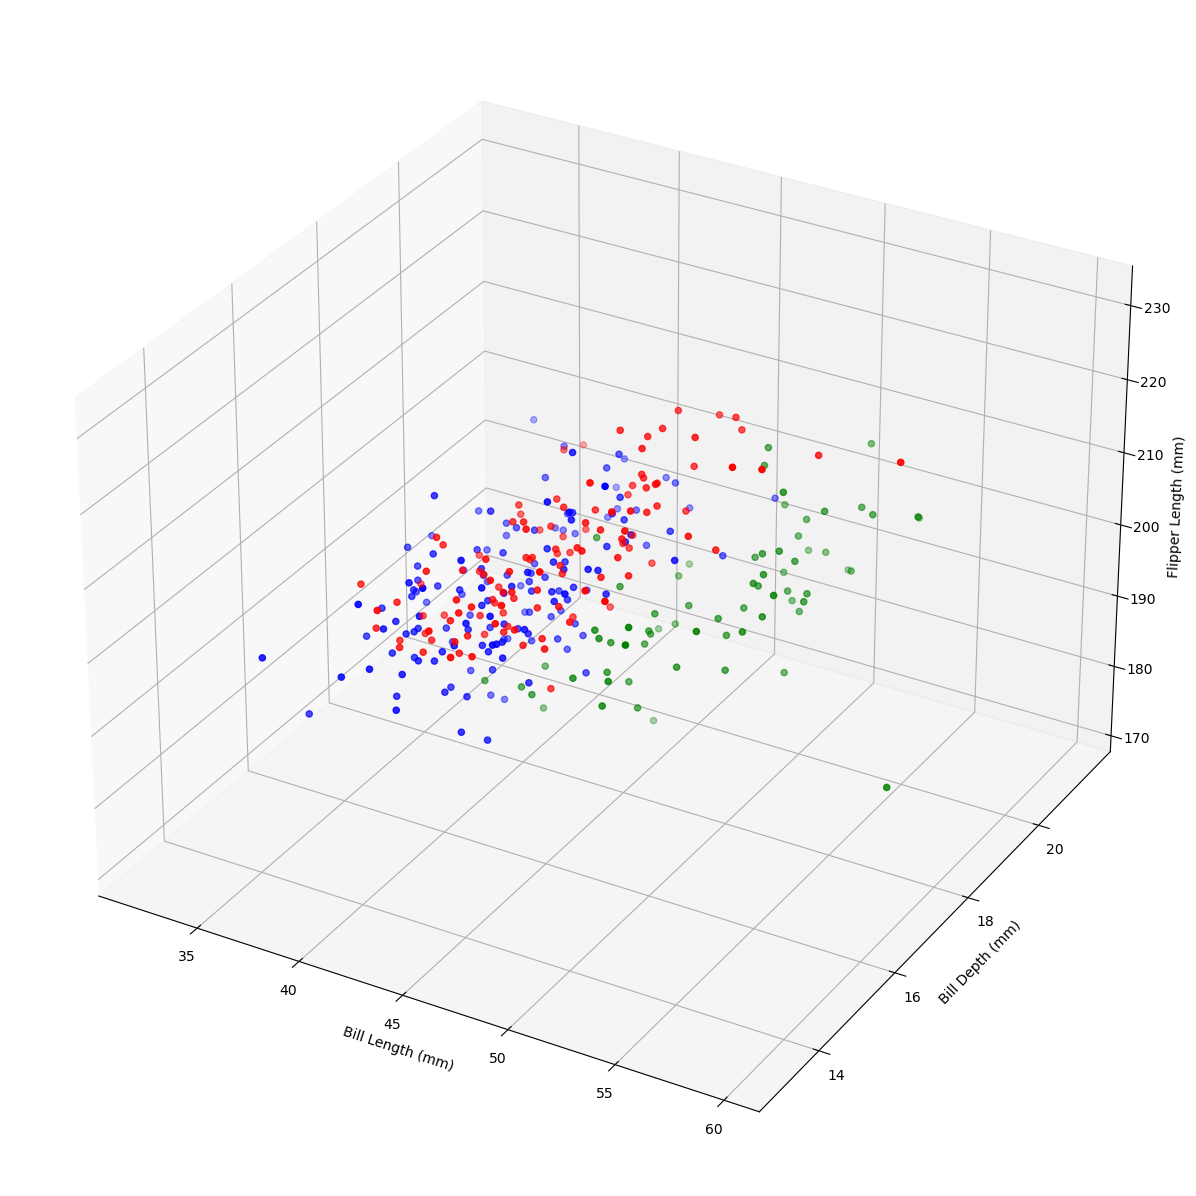

In [59]:

# Create a 3D scatter plot.
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species=='Chinstrap']
Gentoo = df[df.species=='Gentoo']

fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(111, projection='3d')

# Plot the data.
ax.scatter(adelie['bill_length_mm'], adelie['bill_depth_mm'], adelie['flipper_lenght_mm'], c='blue', marker='o')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['bill_depth_mm'], chinstrap['flipper_length_mm'], c='green', marker='o')
ax.scatter(Gentoo['bill_length_mm'], Gentoo['bill_depth_mm'], Gentoo['flipper_length_mm'], c='red', marker='o')

# Set the labels.
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
plt.show()








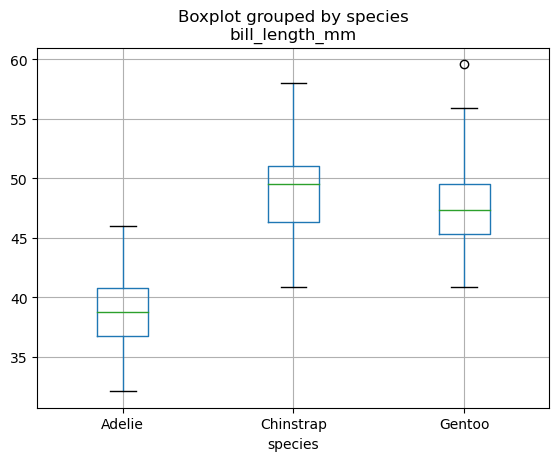

In [9]:
boxplot = df.boxplot(column=['bill_length_mm'], by='species')    

In [25]:

plt.figure(figsize=(12,7))
plt.bar(df, x='species', y = df.species.index, color = 'blue', hue = 'Sex', height =0.8)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species count')
plt.show()

TypeError: bar() got multiple values for argument 'x'

<Figure size 1200x700 with 0 Axes>

# Heading One
## Heading Two
### Heading Three

This is just a paragraph. This is just the way a paragraph is generated in Markdown. There is nothing special about creating a paragraph. Just leave a blank space before you begin and another one when you are done, and that is interpreted as a paragraph.

To italicsise text just put one star before and after like this *example*. To make it bold put two stars in front and behind as in the following **example**.

For bullted lists just use the minus sign as below

- This is a list
- Another item on the list

To use a numbered list just put 1. in front of the items in the list.

1. This is a numbered list
1. This is another item on the numbered list
1. This is another item on the numbered list. Rendering will automatically number the list correctly

#Tables

| Species   |  Bill length (mm) | Body Mass (g) |
|-----------|-------------------|---------------|
| Adelie    |                   |               |
| Chinstrap |                   |               |
| Gentoo    |                   |               |


_This is an italic print_

**_This is bold and italic print_**

Two spaces after your text puts a soft break on that line so you can quote lines of a poem like so.

Does any man dream,    
That a gael can fear.  
Of a thousand deeds,   
Let him learn but one.  

Use the greater than sign for blockquotes......

> Most good programmers do programming not because they expect to get paid or get adulation by the public, but because it is fun to program. **Linus Torvalds**




This readme has being written with [GitHub's documentation on READMEs](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-readmes) in mind. You should refer to that documentation for more information on writing an appropriate README for visitore to your repository.

You can find out more about writing in MarkDown [in GitHub's documentation](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)


<p style="background:black">
<code style="background:black;color:white">C:\Users\Mike> pip3 install roughviz
</code>
</p>

*** 
### End